In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
sujetos_bal = ['P8', 'P17', 'P18', 'P21']
sujetos_imb = ['P3', 'P6', 'P14', 'P19']

## Resultados EEGNet

Las listas "bal" corresponden a los mejores modelos logrados con los sujetos balanceados tras aplicar las distintas técnicas, como la ponderación de pesos. Por otro lado, las listas "imb" corresponden a los mejores modelos de los sujetos no balanceados. En el caso de las variables "before", indican los resultados antes de aplicar la selección de características. Las variables "eegnet_X_sel" corresponden a los métodos de selección de características (ANOVA, MutualInfo e Híbrido) que mejor funcionó para cada participante.

### Balanceados

In [ ]:
# Baseline: Mejor resultado previo (Pesos o Focal Loss)
# Post: Resultado tras selección de características (ANOVA, MI o Híbrido)
net_bal_pre = [0.77, 0.55, 0.55, 0.63]
net_bal_post = [0.45, 0.60, 0.43, 0.65]

net_bal_rec_pre = [0.77, 0.57, 0.51, 0.66]
net_bal_rec_post = [0.53, 0.62, 0.53, 0.75]

net_bal_t = ['A', 'H', 'A', 'MI']


### Desbalanceados

In [9]:
net_imb_pre = [0.57, 0.52, 0.69, 0.61]
net_imb_post = [0.58, 0.40, 0.45, 0.43]

net_imb_roc_pre = [0.79, 0.58, 0.72, 0.65]   
net_imb_roc_post = [0.54, 0.42, 0.61, 0.67]

net_imb_t = ['H', 'MI', 'A', 'MI']

## Resultados EEGNeX

### Balanceados

In [21]:
nex_bal_pre = [0.82, 0.64, 0.51, 0.88]
nex_bal_post = [0.88, 0.61, 0.50, 0.81]

nex_bal_rec_pre = [0.87, 0.65, 0.52, 0.89]
nex_bal_rec_post = [0.90, 0.63, 0.53, 0.82]

nex_bal_t = ['A', 'H', 'MI', 'MI']


### Desbalanceados

In [20]:
nex_imb_pre = [0.57, 0.63, 0.59, 0.62]
nex_imb_post = [0.57, 0.65, 0.57, 0.53]

nex_imb_roc_pre = [0.663, 0.78, 0.70, 0.67]  
nex_imb_roc_post = [0.601, 0.73, 0.68, 0.49]
nex_imb_t = ['H', 'H', 'A', 'A']

## Resultados AttentionBaseNet

### Balanceados

In [17]:
att_bal_pre = [0.81, 0.62, 0.54, 0.82]
att_bal_post = [0.86, 0.55, 0.50, 0.72]

att_bal_rec_pre = [0.81, 0.61, 0.56, 0.81]   
att_bal_rec_post = [0.87, 0.55, 0.53, 0.72]

att_bal_t = ['H', 'A', 'H', 'A']



### Desbalanceados

In [18]:
att_imb_pre = [0.62, 0.67, 0.59, 0.61]
att_imb_post = [0.56, 0.49, 0.56, 0.52]

att_imb_roc_pre = [0.68, 0.76, 0.77, 0.71]   
att_imb_roc_post = [0.56, 0.50, 0.61, 0.66]

att_imb_t = ['A', 'MI', 'H', 'A']

## Generar las gráficas

In [14]:
def plot_final(sujetos, pre, post, t, titulo, metrica, out, color_post):
    x = np.arange(len(sujetos))
    w = 0.25
    
    plt.figure(figsize=(9, 5))
    
    plt.bar(x - w/2, pre, w, label='Modelo base', color='#ffbdb5')
    
    # La selección cambia de color según la arquitectura
    barras = plt.bar(x + w/2, post, w, label='Con selección', color=color_post)

    # Etiquetas de técnica (A, MI, H)
    for i, b in enumerate(barras):
        plt.text(b.get_x() + b.get_width()/2, b.get_height() + 0.01, t[i], 
                 ha='center', va='bottom', fontsize=9)

    plt.ylabel(metrica) 
    plt.title(titulo)
    plt.xticks(x, sujetos)
    plt.ylim(0, 1.1) 
    plt.legend(loc='upper center', ncol=2)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()

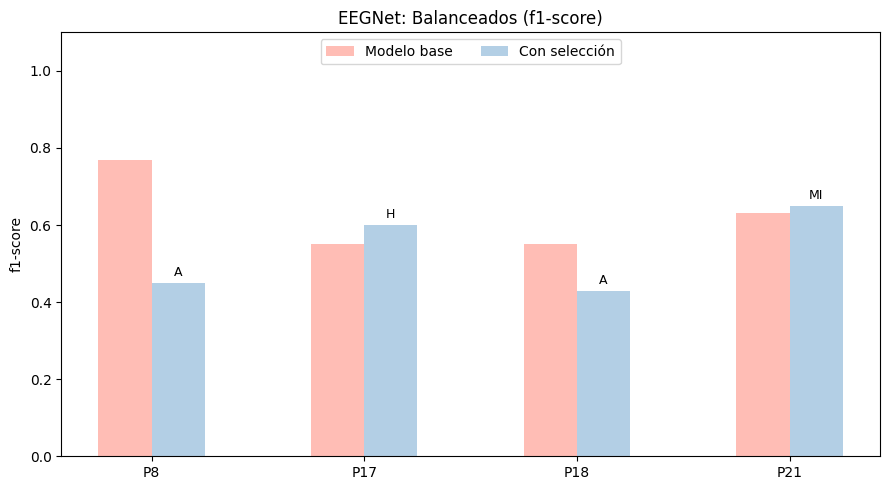

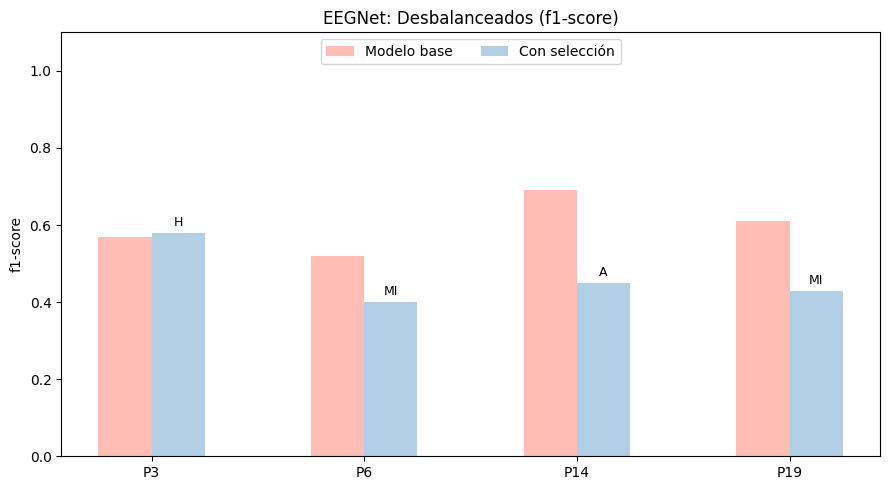

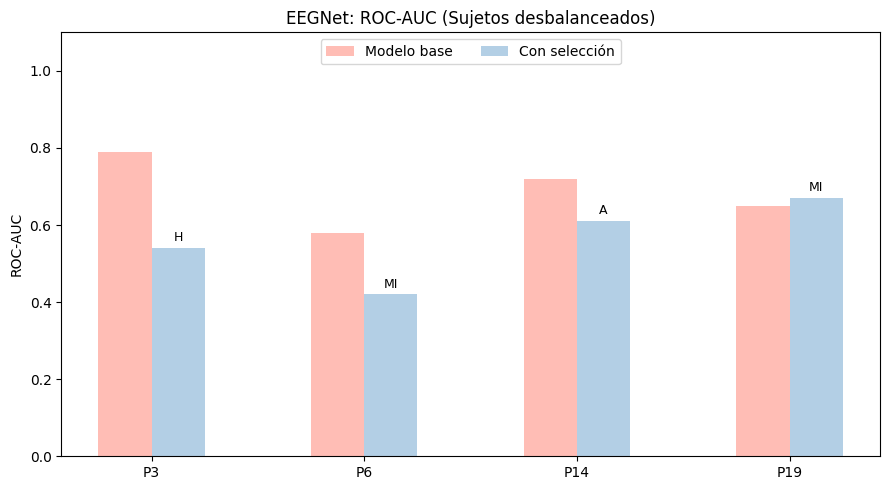

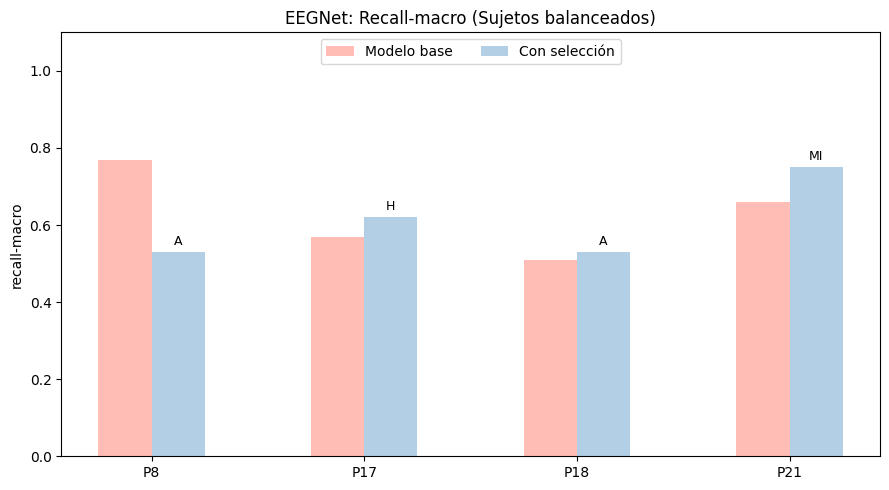

In [ ]:
# F1-Score 
plot_final(sujetos_bal, net_bal_pre, net_bal_post, net_bal_t, 'EEGNet: Balanceados (f1-score)', 'f1-score', 'net_f1_bal.png', '#b3cfe5')
plot_final(sujetos_imb, net_imb_pre, net_imb_post, net_imb_t, 'EEGNet: Desbalanceados (f1-score)', 'f1-score', 'net_f1_imb.png', '#b3cfe5')

# ROC-AUC (Desbalanceados)
plot_final(sujetos_imb, net_imb_roc_pre, net_imb_roc_post, net_imb_t, 'EEGNet: ROC-AUC (Sujetos desbalanceados)', 'ROC-AUC', 'net_roc_imb.png', '#b3cfe5')

# Recall (Balanceados)
plot_final(sujetos_bal, net_bal_rec_pre, net_bal_rec_post, net_bal_t, 'EEGNet: Recall-macro (Sujetos balanceados)', 'recall-macro', 'net_rec_bal.png', '#b3cfe5')

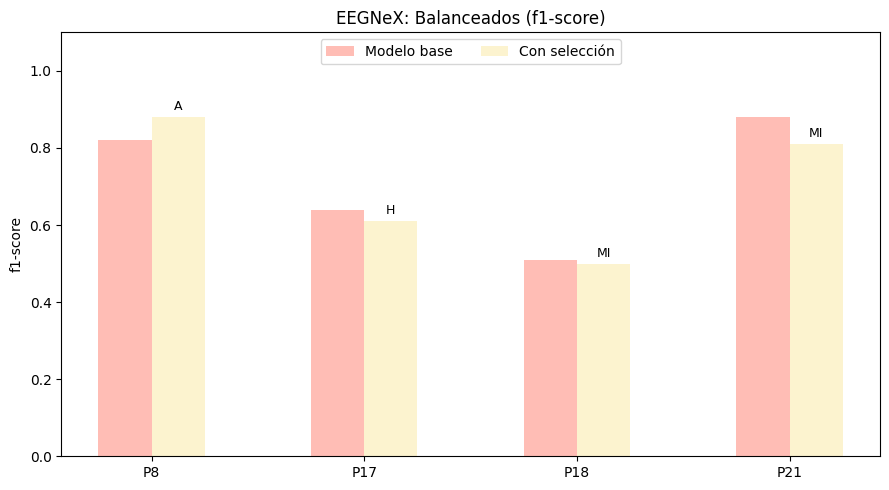

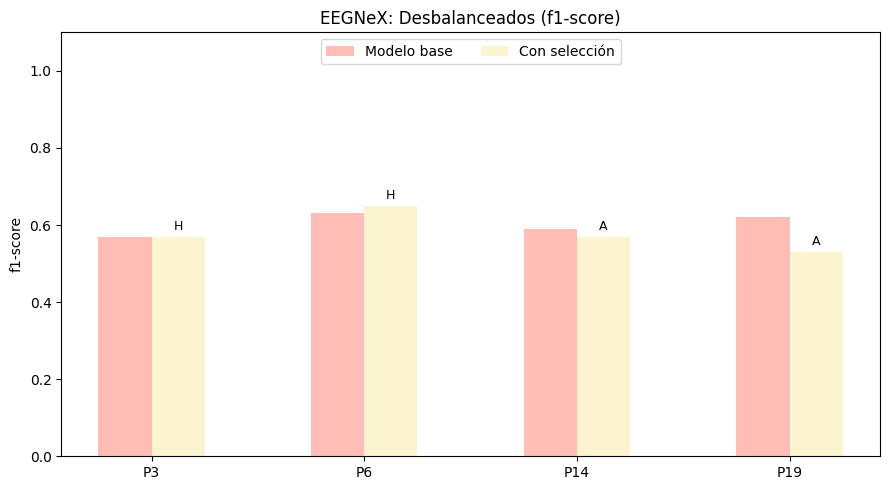

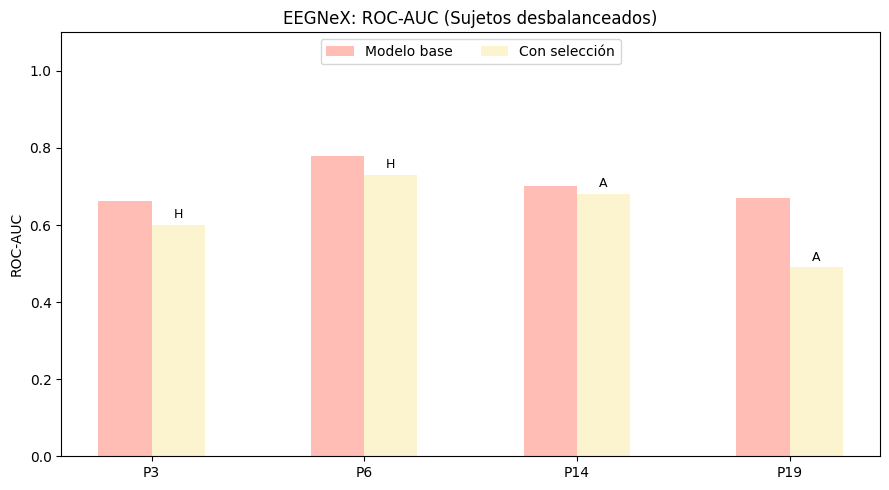

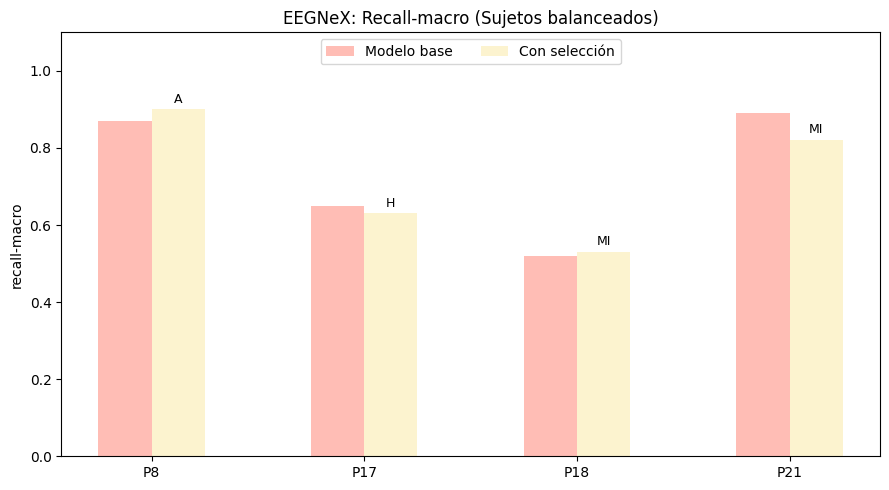

In [22]:
# F1-Score
plot_final(sujetos_bal, nex_bal_pre, nex_bal_post, nex_bal_t, 'EEGNeX: Balanceados (f1-score)', 'f1-score', 'nex_f1_bal.png', '#fcf3cf')
plot_final(sujetos_imb, nex_imb_pre, nex_imb_post, nex_imb_t, 'EEGNeX: Desbalanceados (f1-score)', 'f1-score', 'nex_f1_imb.png', '#fcf3cf')

# ROC-AUC (Desbalanceados)
plot_final(sujetos_imb, nex_imb_roc_pre, nex_imb_roc_post, nex_imb_t, 'EEGNeX: ROC-AUC (Sujetos desbalanceados)', 'ROC-AUC', 'nex_roc_imb.png', '#fcf3cf')

# Recall (Balanceados)
plot_final(sujetos_bal, nex_bal_rec_pre, nex_bal_rec_post, nex_bal_t, 'EEGNeX: Recall-macro (Sujetos balanceados)', 'recall-macro', 'nex_rec_bal.png', '#fcf3cf')

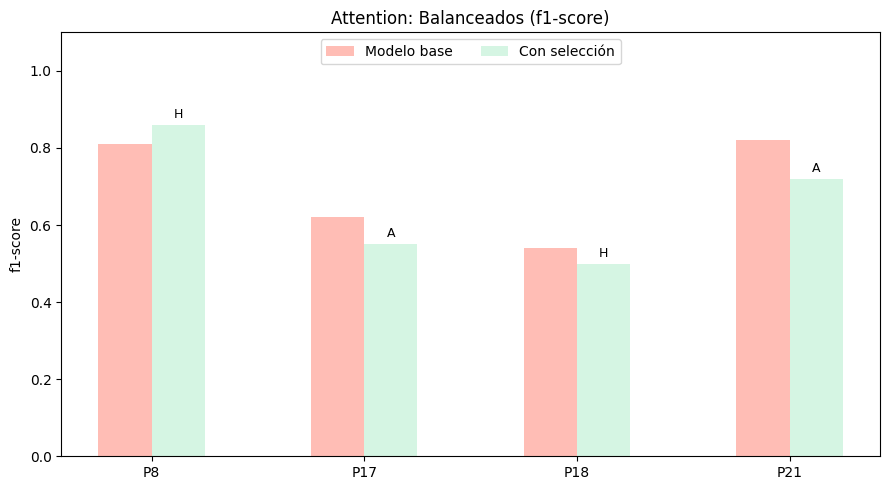

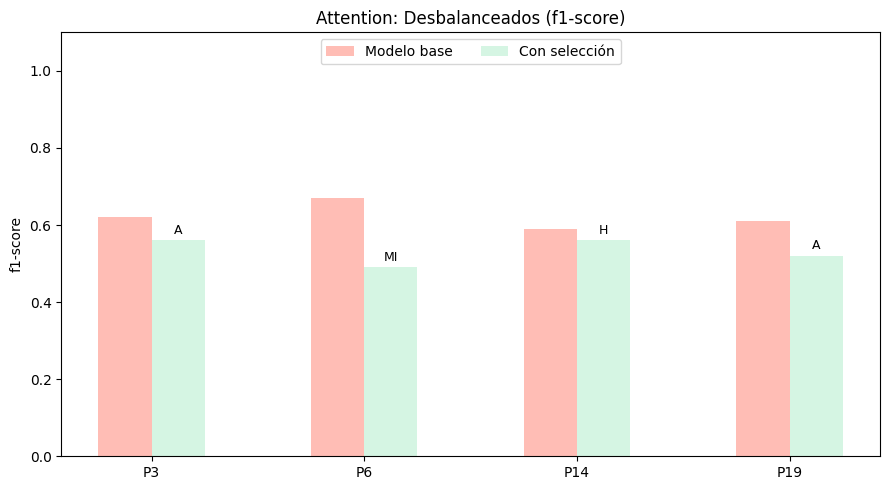

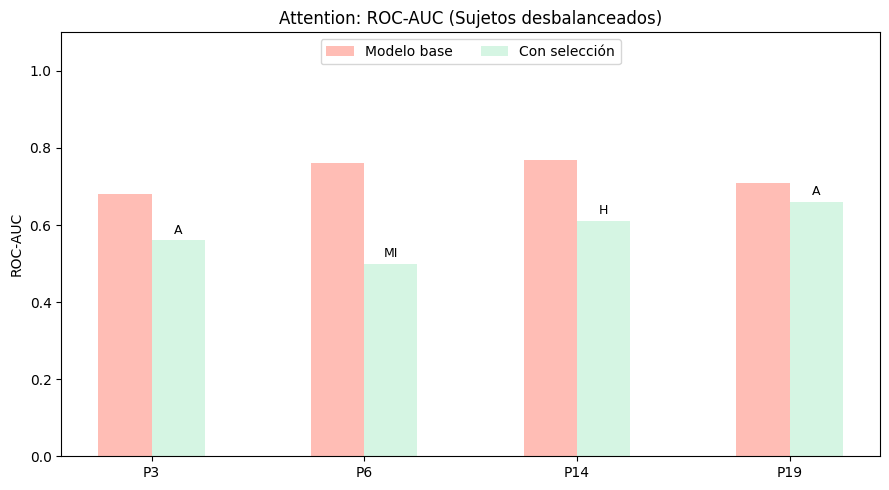

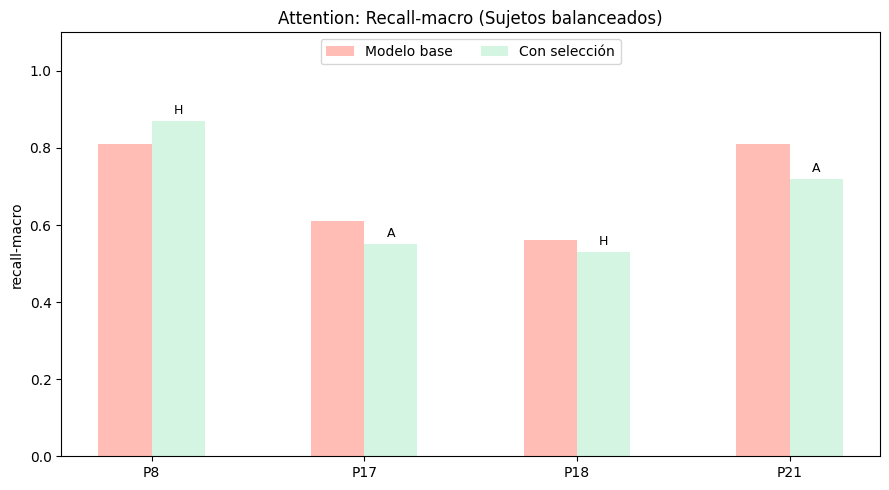

In [19]:
# F1-Score
plot_final(sujetos_bal, att_bal_pre, att_bal_post, att_bal_t, 'Attention: Balanceados (f1-score)', 'f1-score', 'att_f1_bal.png', '#d5f5e3')
plot_final(sujetos_imb, att_imb_pre, att_imb_post, att_imb_t, 'Attention: Desbalanceados (f1-score)', 'f1-score', 'att_f1_imb.png', '#d5f5e3')

# ROC-AUC (Desbalanceados)
plot_final(sujetos_imb, att_imb_roc_pre, att_imb_roc_post, att_imb_t, 'Attention: ROC-AUC (Sujetos desbalanceados)', 'ROC-AUC', 'att_roc_imb.png', '#d5f5e3')

# Recall (Balanceados)
plot_final(sujetos_bal, att_bal_rec_pre, att_bal_rec_post, att_bal_t, 'Attention: Recall-macro (Sujetos balanceados)', 'recall-macro', 'att_rec_bal.png', '#d5f5e3')